<a href="https://colab.research.google.com/github/noisysai1/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction_Machine_Learning_and_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/usmanabbsi088/customer-churn-prediction


In [ ]:
# importing libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats

# Step 1. Loading and Explore the Data Set


Uploading of a files from Device

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.shape

(10000, 14)

Checking the missing values

In [ ]:
print( df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
from scipy import stats
def find_outliers_zscore(df):
    z = np.abs(stats.zscore(df))
    outliers = df[(z > 3)]
    return outliers

In [ ]:
print(find_outliers_zscore(df['CreditScore']))

1405    359
1631    350
1838    350
1962    358
2473    351
8723    350
8762    350
9624    350
Name: CreditScore, dtype: int64


In [ ]:
print(find_outliers_zscore(df['Age']))

85      75
158     73
230     72
252     79
310     80
        ..
9646    71
9671    78
9736    78
9894    77
9936    77
Name: Age, Length: 133, dtype: int64


In [ ]:
print(find_outliers_zscore(df['Tenure']))

Series([], Name: Tenure, dtype: int64)


In [ ]:
print(find_outliers_zscore(df['Balance']))

Series([], Name: Balance, dtype: float64)


# Step 2: Exploratory Data Analysis (EDA)


In [ ]:
# Applying to numerical columns only
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    print(f"Outliers in {col}:\n{find_outliers_zscore(df[col])}\n")

Outliers in RowNumber:
Series([], Name: RowNumber, dtype: int64)

Outliers in CustomerId:
Series([], Name: CustomerId, dtype: int64)

Outliers in CreditScore:
1405    359
1631    350
1838    350
1962    358
2473    351
8723    350
8762    350
9624    350
Name: CreditScore, dtype: int64

Outliers in Age:
85      75
158     73
230     72
252     79
310     80
        ..
9646    71
9671    78
9736    78
9894    77
9936    77
Name: Age, Length: 133, dtype: int64

Outliers in Tenure:
Series([], Name: Tenure, dtype: int64)

Outliers in Balance:
Series([], Name: Balance, dtype: float64)

Outliers in NumOfProducts:
7       4
70      4
1254    4
1469    4
1488    4
1701    4
1876    4
2124    4
2196    4
2285    4
2462    4
2499    4
2509    4
2541    4
2614    4
2617    4
2872    4
3152    4
3365    4
3841    4
4013    4
4014    4
4166    4
4260    4
4403    4
4511    4
4516    4
4606    4
4654    4
4748    4
4822    4
5010    4
5137    4
5235    4
5386    4
5700    4
5904    4
6150    4
6172 

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

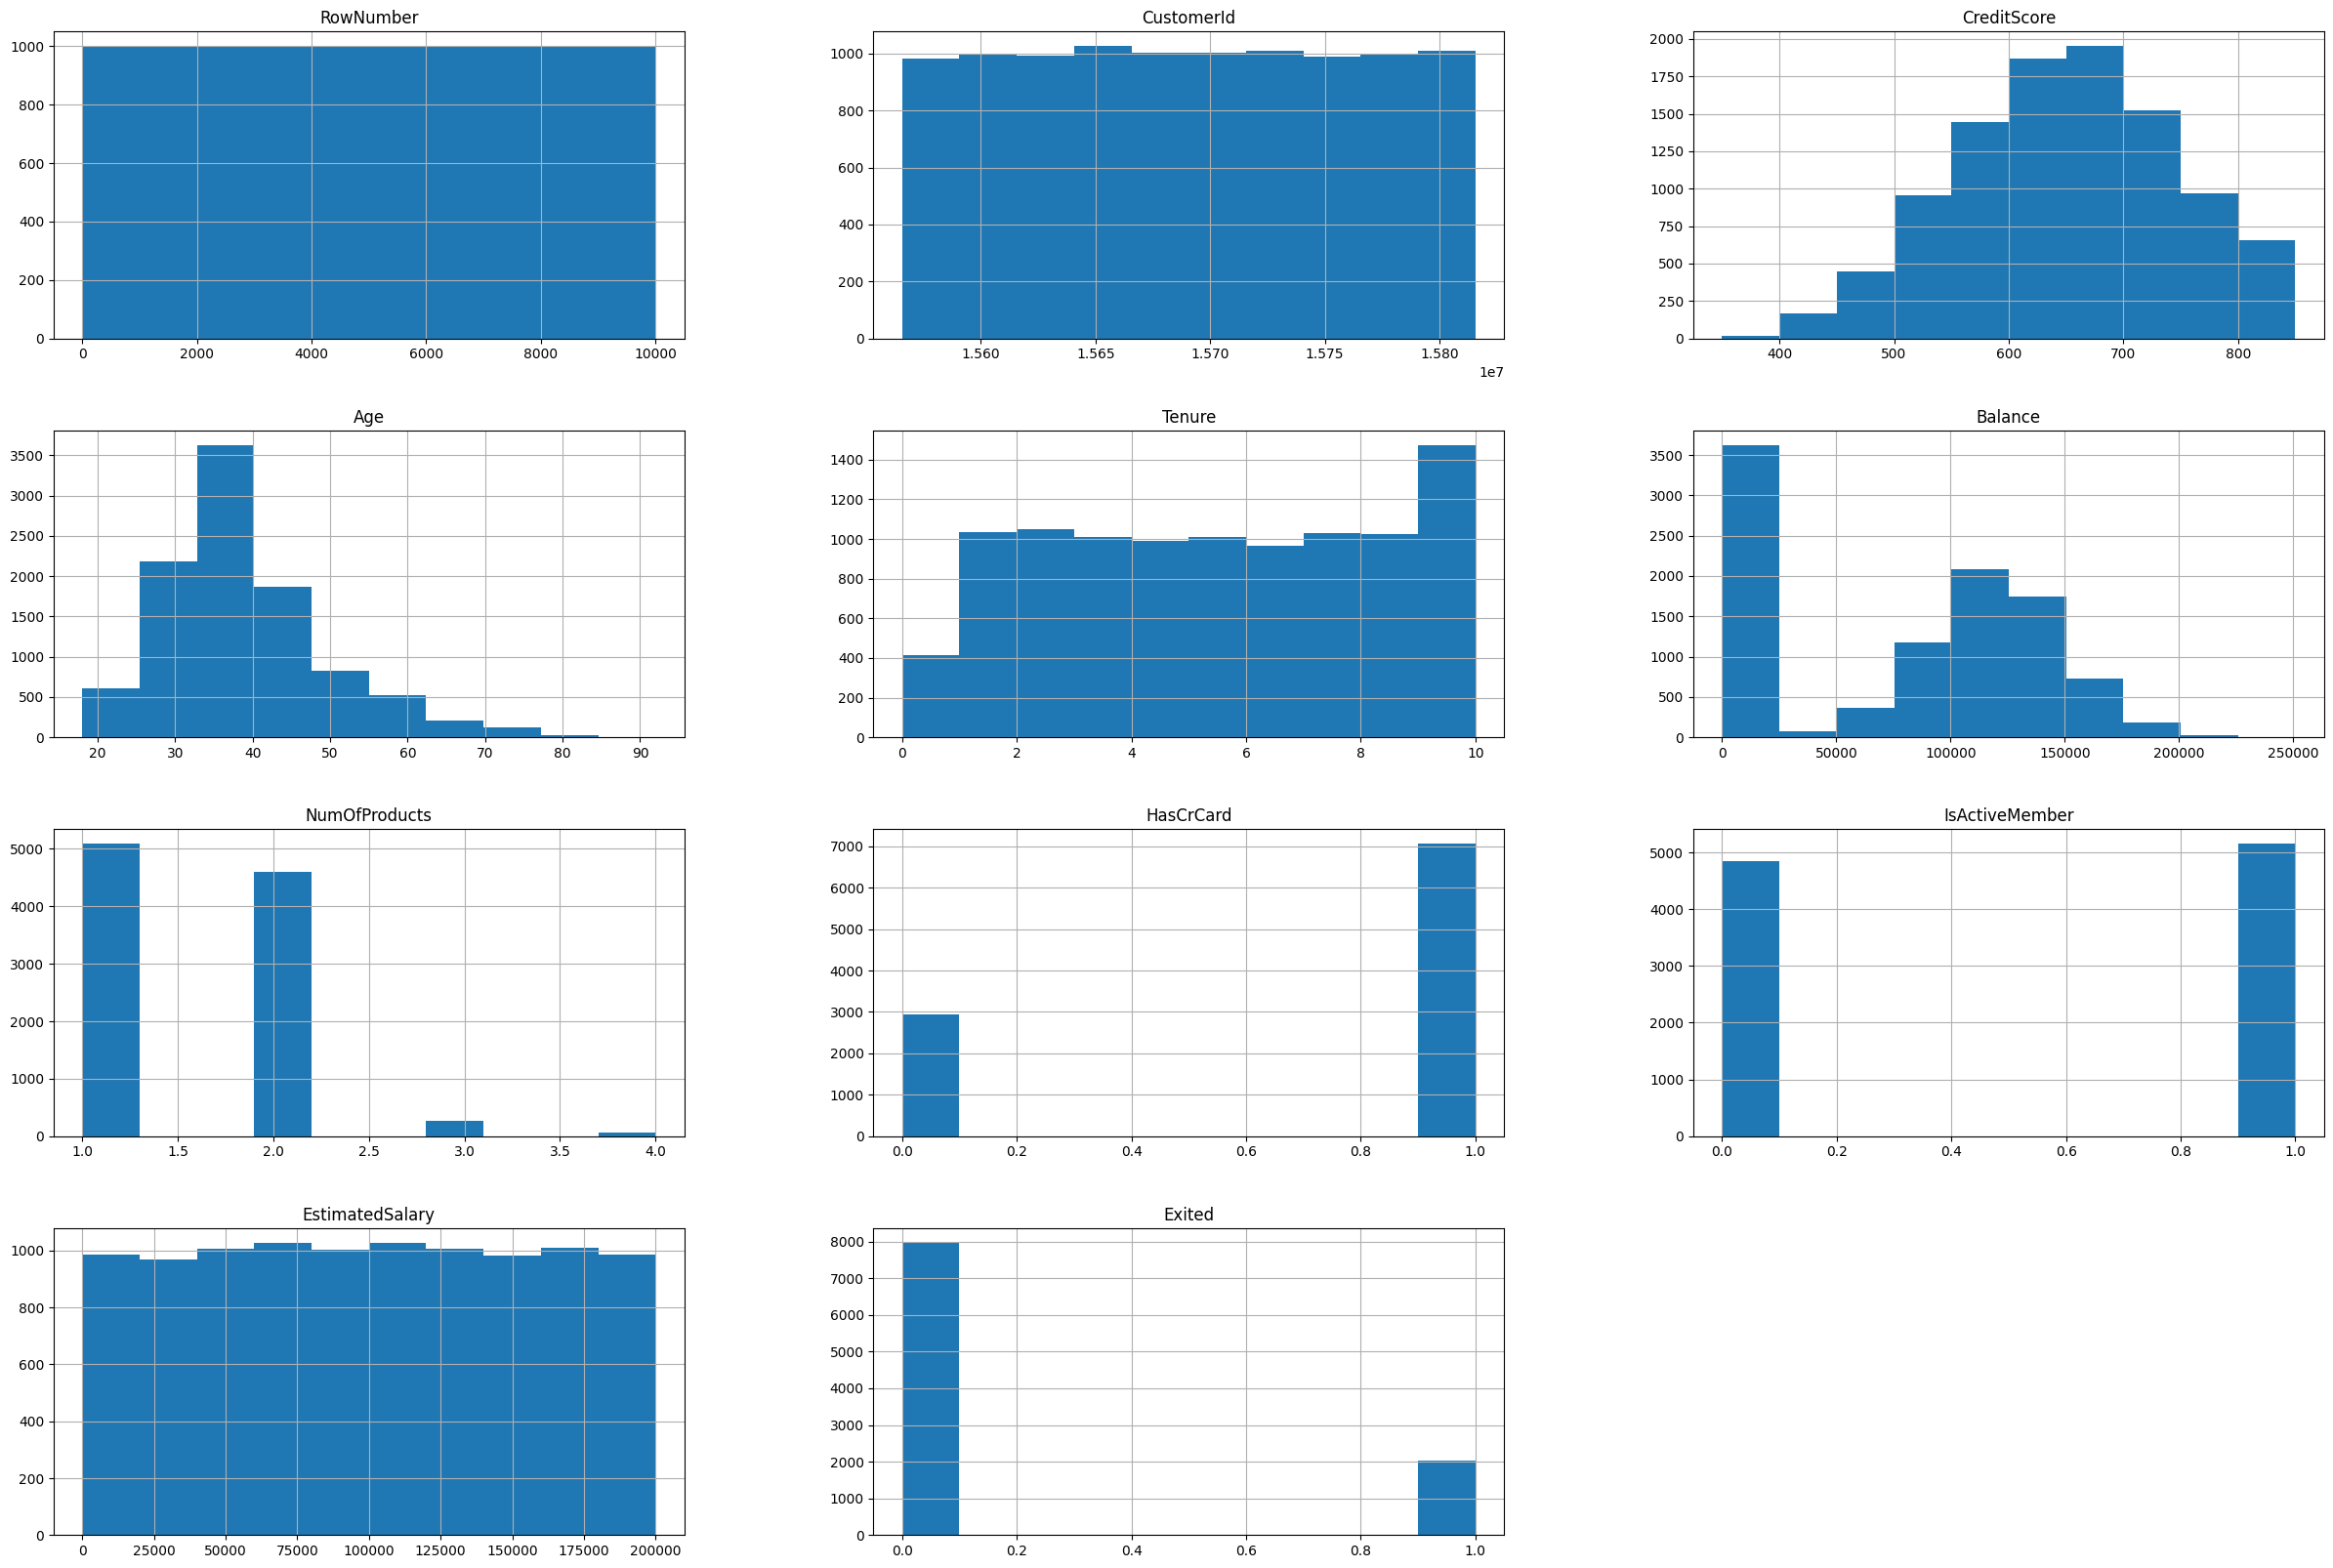

In [ ]:
df.hist( figsize=(30,20))

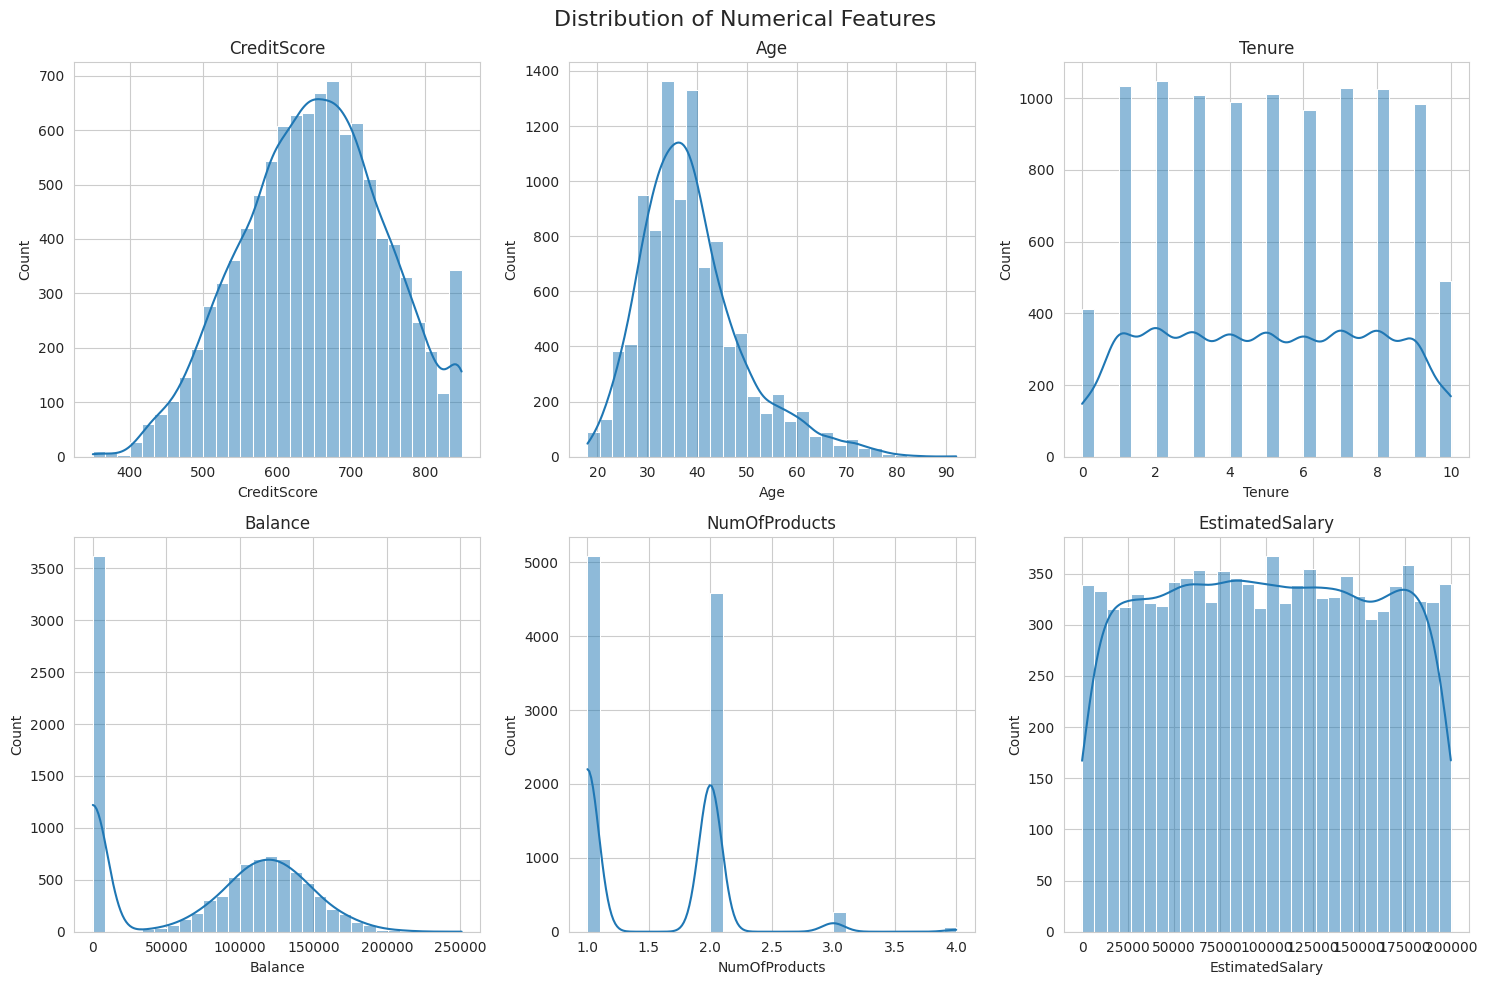

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Plot distributions for numerical columns
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Create histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()

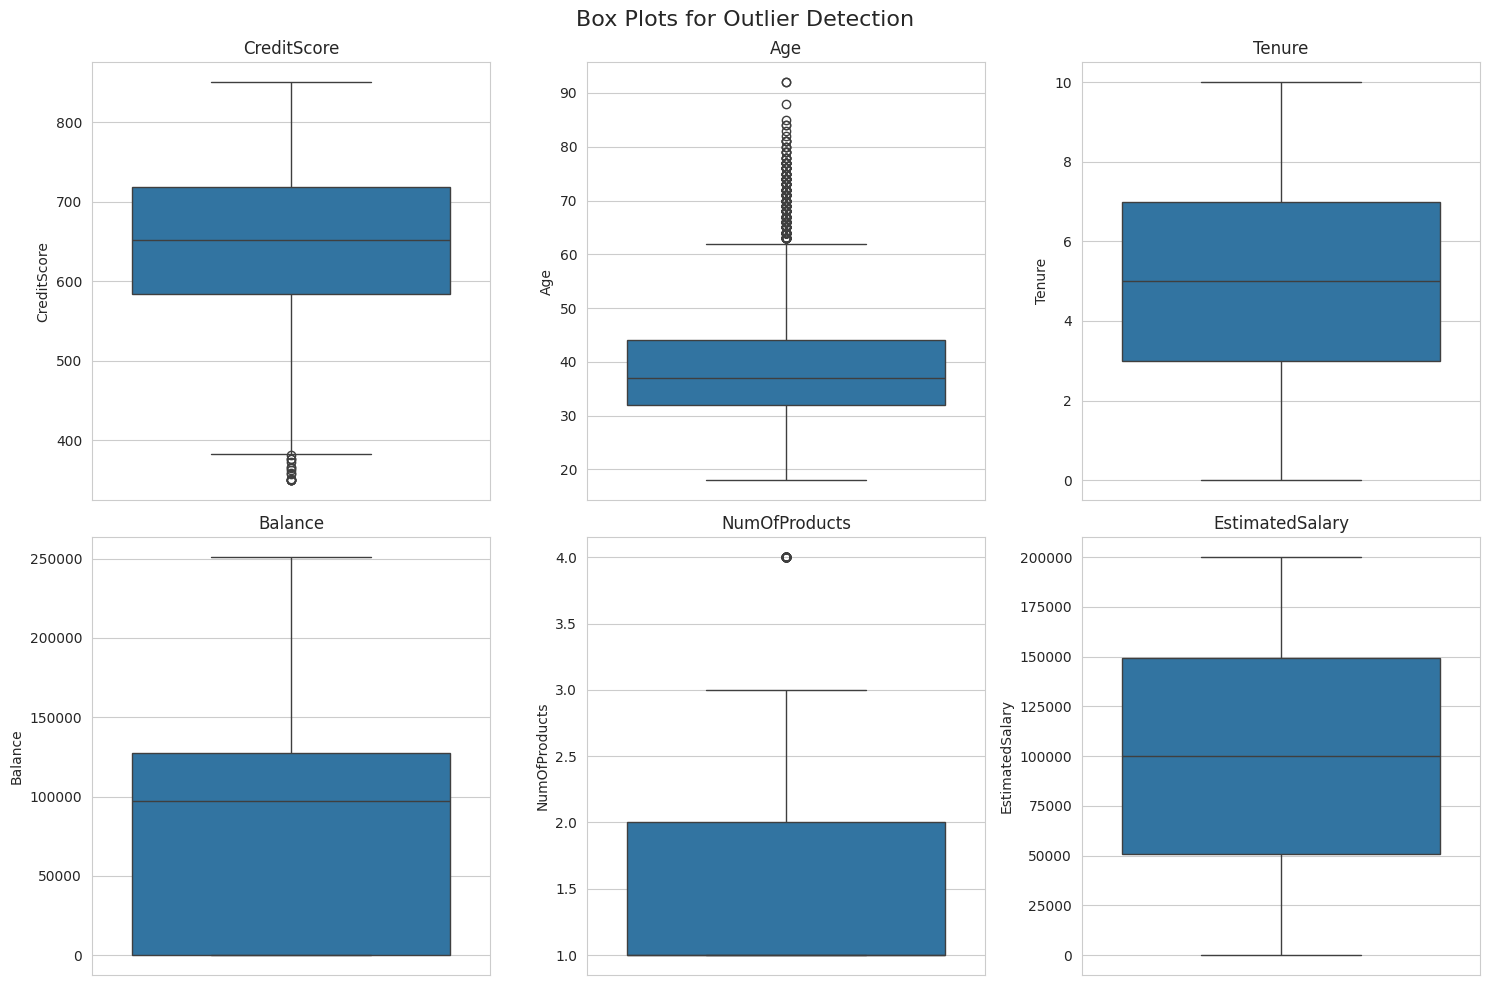

In [ ]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Box Plots for Outlier Detection", fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()

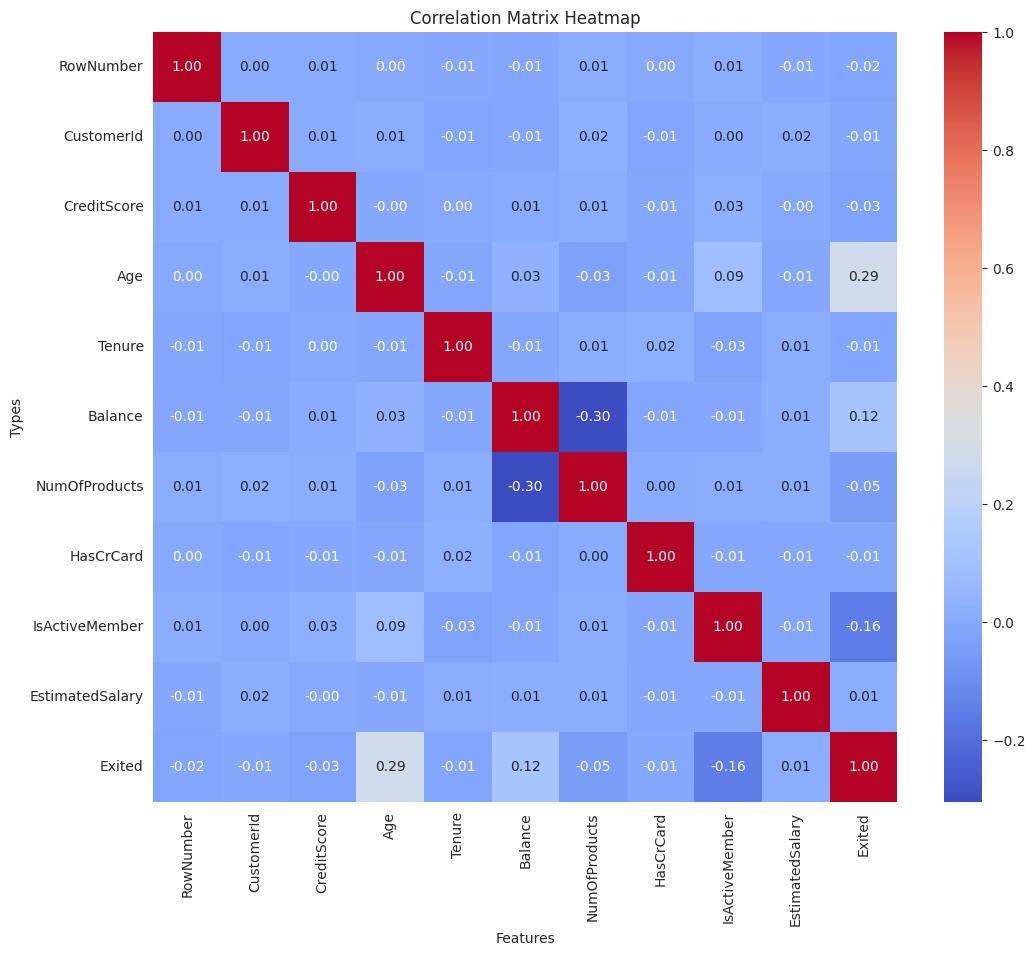

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Types')
plt.show()

# Step 3: Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop unnecessary columns (RowNumber, CustomerId, Surname)
df_cleaned = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
print(df_cleaned.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [ ]:
# Encode categorical variables (Geography, Gender)
label_encoders = {}
for col in ["Geography", "Gender"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le
    print(f"Label Encoder for {col}: {le.classes_}")

Label Encoder for Geography: ['France' 'Germany' 'Spain']
Label Encoder for Gender: ['Female' 'Male']


In [ ]:
# Scale numerical features
scaler = StandardScaler()
scaled_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
df_cleaned[scaled_columns] = scaler.fit_transform(df_cleaned[scaled_columns])
print(df_cleaned.head())

   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.326221          0       0  0.293517 -1.041760 -1.225848   
1    -0.440036          2       0  0.198164 -1.387538  0.117350   
2    -1.536794          0       0  0.293517  1.032908  1.333053   
3     0.501521          0       0  0.007457 -1.387538 -1.225848   
4     2.063884          2       0  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1         0.021886       1  
1              1          0               1         0.216534       0  
2              3          1               0         0.240687       1  
3              2          0               0        -0.108918       0  
4              1          1               1        -0.365276       0  


# Step 4: Feature Engineering


In [ ]:
# Feature Engineering: Creating new meaningful features

# Creating an "Age Group" feature based on Age
df_cleaned["AgeGroup"] = pd.cut(df["Age"], bins=[18, 30, 40, 50, 60, 100], labels=[0, 1, 2, 3, 4])
print(df_cleaned.head())

   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.326221          0       0  0.293517 -1.041760 -1.225848   
1    -0.440036          2       0  0.198164 -1.387538  0.117350   
2    -1.536794          0       0  0.293517  1.032908  1.333053   
3     0.501521          0       0  0.007457 -1.387538 -1.225848   
4     2.063884          2       0  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited AgeGroup  
0              1          1               1         0.021886       1        2  
1              1          0               1         0.216534       0        2  
2              3          1               0         0.240687       1        2  
3              2          0               0        -0.108918       0        1  
4              1          1               1        -0.365276       0        2  


In [ ]:
# Interaction feature: Combining CreditScore and Balance for financial risk assessment
df_cleaned["Credit_Balance_Ratio"] = df["CreditScore"] / (df["Balance"] + 1)  # Adding 1 to avoid division by zero
print(df_cleaned.head())

   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.326221          0       0  0.293517 -1.041760 -1.225848   
1    -0.440036          2       0  0.198164 -1.387538  0.117350   
2    -1.536794          0       0  0.293517  1.032908  1.333053   
3     0.501521          0       0  0.007457 -1.387538 -1.225848   
4     2.063884          2       0  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited AgeGroup  \
0              1          1               1         0.021886       1        2   
1              1          0               1         0.216534       0        2   
2              3          1               0         0.240687       1        2   
3              2          0               0        -0.108918       0        1   
4              1          1               1        -0.365276       0        2   

   Credit_Balance_Ratio  
0            619.000000  
1              0.007255  
2              0.003144  
3     

In [ ]:
# Removing highly correlated or less relevant features (if needed)
df_final = df_cleaned.drop(columns=["Tenure"])  # Example: Removing Tenure (low correlation with target variable)

print(df_final.head())



   CreditScore  Geography  Gender       Age   Balance  NumOfProducts  \
0    -0.326221          0       0  0.293517 -1.225848              1   
1    -0.440036          2       0  0.198164  0.117350              1   
2    -1.536794          0       0  0.293517  1.333053              3   
3     0.501521          0       0  0.007457 -1.225848              2   
4     2.063884          2       0  0.388871  0.785728              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited AgeGroup  \
0          1               1         0.021886       1        2   
1          0               1         0.216534       0        2   
2          1               0         0.240687       1        2   
3          0               0        -0.108918       0        1   
4          1               1        -0.365276       0        2   

   Credit_Balance_Ratio  
0            619.000000  
1              0.007255  
2              0.003144  
3            699.000000  
4              0.006772  


In [ ]:
# Convert AgeGroup to numerical values
df_final["AgeGroup"] = df_final["AgeGroup"].astype("category").cat.codes

print(df_final.head())

   CreditScore  Geography  Gender       Age   Balance  NumOfProducts  \
0    -0.326221          0       0  0.293517 -1.225848              1   
1    -0.440036          2       0  0.198164  0.117350              1   
2    -1.536794          0       0  0.293517  1.333053              3   
3     0.501521          0       0  0.007457 -1.225848              2   
4     2.063884          2       0  0.388871  0.785728              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  AgeGroup  \
0          1               1         0.021886       1         2   
1          0               1         0.216534       0         2   
2          1               0         0.240687       1         2   
3          0               0        -0.108918       0         1   
4          1               1        -0.365276       0         2   

   Credit_Balance_Ratio  
0            619.000000  
1              0.007255  
2              0.003144  
3            699.000000  
4              0.006772  


In [ ]:
# Display the processed dataset preview
df_final.head()


,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Credit_Balance_Ratio
0,-0.326221,0,0,0.293517,-1.225848,1,1,1,0.021886,1,2,619.000000
1,-0.440036,2,0,0.198164,0.117350,1,0,1,0.216534,0,2,0.007255
2,-1.536794,0,0,0.293517,1.333053,3,1,0,0.240687,1,2,0.003144
3,0.501521,0,0,0.007457,-1.225848,2,0,0,-0.108918,0,1,699.000000
4,2.063884,2,0,0.388871,0.785728,1,1,1,-0.365276,0,2,0.006772


# Step 5: Model Selection & Training (Fixing Missing Values)


In [ ]:
# Check for missing values before processing
missing_values_before = df_final.isnull().sum()

# Fill missing values in AgeGroup with mode
df_final["AgeGroup"] = df_final["AgeGroup"].astype("category").cat.codes

# Check for missing values after processing
missing_values_after = df_final.isnull().sum()

# Display missing values report
print("Missing Values Before Processing:\n", missing_values_before)
print("\nMissing Values After Processing:\n", missing_values_after)


Missing Values Before Processing:
 CreditScore             0
Geography               0
Gender                  0
Age                     0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited                  0
AgeGroup                0
Credit_Balance_Ratio    0
dtype: int64

Missing Values After Processing:
 CreditScore             0
Geography               0
Gender                  0
Age                     0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited                  0
AgeGroup                0
Credit_Balance_Ratio    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split

# Splitting data into training & testing sets
X = df_final.drop(columns=["Exited"])
y = df_final["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Add this line at the beginning of your code to import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Add these line to import necessary modules for models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Model Evaluation
log_reg_acc = accuracy_score(y_test, y_pred_log)

# Classification reports
log_reg_report = classification_report(y_test, y_pred_log)

# Display model results
print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")
print("Logistic Regression Report:\n", log_reg_report)


Logistic Regression Accuracy: 0.82
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.64      0.19      0.30       393

    accuracy                           0.82      2000
   macro avg       0.74      0.58      0.60      2000
weighted avg       0.79      0.82      0.78      2000



In [ ]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
rf_acc = accuracy_score(y_test, y_pred_rf)

# Classification reports
rf_report = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_acc:.2f}")
print("Random Forest Report:\n", rf_report)

Random Forest Accuracy: 0.86
Random Forest Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# Train GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)
y_pred_grad = grad_boost.predict(X_test)

# Model Evaluation
grad_boost_acc = accuracy_score(y_test, y_pred_grad)


# Classification reports
grad_boost_report = classification_report(y_test, y_pred_grad)


# Display model results
print(f"Grading Boost Accuracy: {grad_boost_acc:.2f}")
print(" Grading Boost Report:\n ", grad_boost_report)


Grading Boost Accuracy: 0.87
 Grading Boost Report:
                precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# Step 6: Model Evaluation


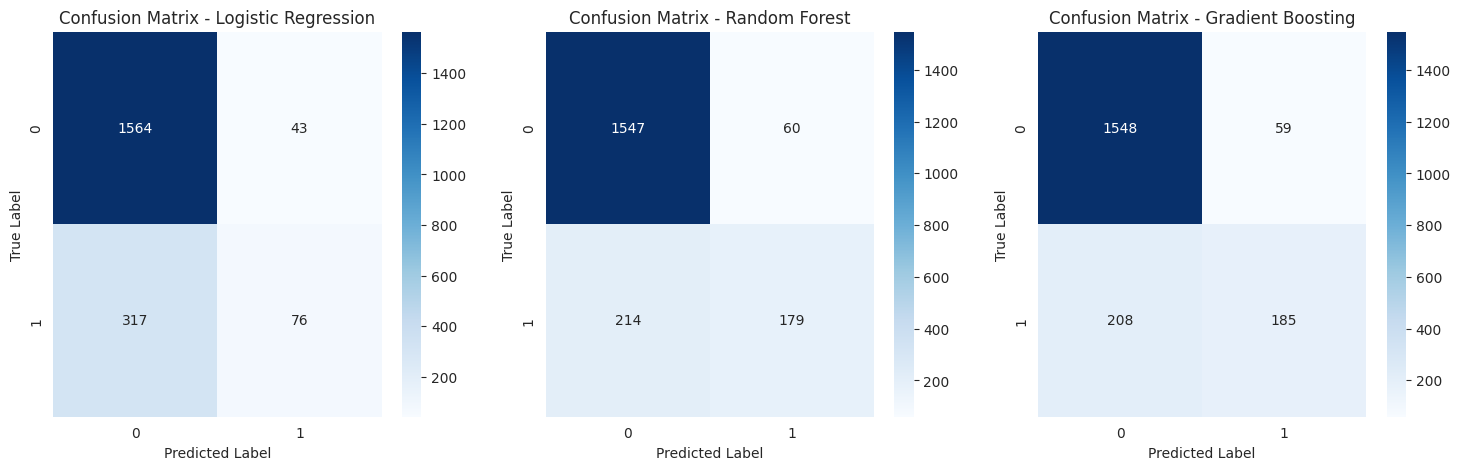

In [ ]:
# Compute confusion matrices for all models
conf_matrix_log = confusion_matrix(y_test, log_reg.predict(X_test))
conf_matrix_rf = confusion_matrix(y_test, rf_model.predict(X_test))
conf_matrix_gb = confusion_matrix(y_test, grad_boost.predict(X_test))

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Confusion Matrix - Gradient Boosting")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.show()

In [ ]:
# Compute ROC curves for all models
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_gb = grad_boost.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

# Compute AUC scores
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)

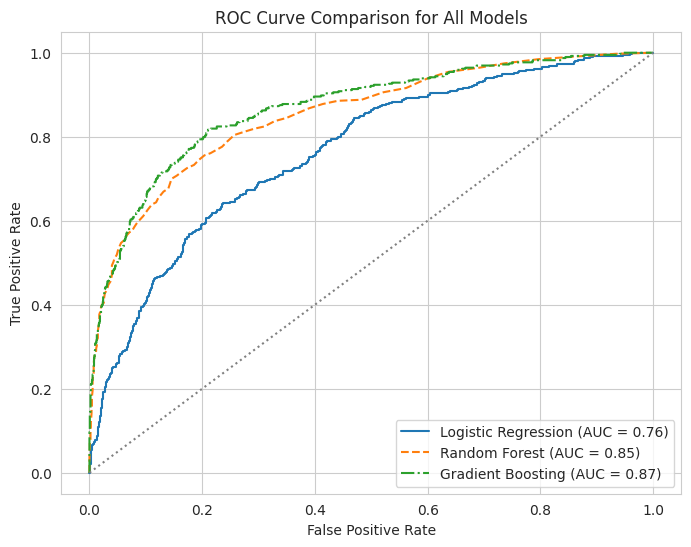

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle="--")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.2f})", linestyle="-.")
plt.plot([0, 1], [0, 1], color="grey", linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for All Models")
plt.legend()
plt.show()


In [ ]:
# Display AUC Scores
print(f"\nAUC Scores:")
print(f"Logistic Regression AUC: {auc_log:.2f}")
print(f"Random Forest AUC: {auc_rf:.2f}")
print(f"Gradient Boosting AUC: {auc_gb:.2f}")


AUC Scores:
Logistic Regression AUC: 0.76
Random Forest AUC: 0.85
Gradient Boosting AUC: 0.87


# Step 7: Model Deployment


In [ ]:
import joblib

# Save the Random Forest model (or Gradient Boosting)
joblib.dump(rf_model, "churn_model.pkl")
print("Model saved as churn_model.pkl")


Model saved as churn_model.pkl


In [ ]:
!pip install flask
!pip install pyngrok

In [ ]:
!pip install pyngrok
!ngrok authtoken 2t8xA4Pge42vKC5jNAUQnsMC6E6_75Dqdryqk5CPZu2PzAvq1


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
from pyngrok import ngrok

# Load the trained model
model = joblib.load("churn_model.pkl")

# Create Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "Churn Prediction API is Running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from POST request
        data = request.get_json()

        # Convert data to numpy array for model prediction
        input_data = np.array(data["features"]).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)
        probability = model.predict_proba(input_data)[:, 1]

        # Return result
        result = {
            "churn_prediction": int(prediction[0]),
            "probability": float(probability[0])
        }
        return jsonify(result)

    except Exception as e:
        return jsonify({"error": str(e)})

# Start Flask and ngrok tunnel
if __name__ == '__main__':
    # Open a public URL for Flask app using ngrok
    public_url = ngrok.connect(5000)
    print(f"Public URL: {public_url}")

from flask import Flask, request, jsonify
import joblib
import numpy as np
from pyngrok import ngrok

# Load the trained model
model = joblib.load("churn_model.pkl")

# Create Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "Churn Prediction API is Running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from POST request
        data = request.get_json()

        # Convert data to numpy array for model prediction
        input_data = np.array(data["features"]).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)
        probability = model.predict_proba(input_data)[:, 1]

        # Return result
        result = {
            "churn_prediction": int(prediction[0]),
            "probability": float(probability[0])
        }
        return jsonify(result)

    except Exception as e:
        return jsonify({"error": str(e)})

# Start Flask and ngrok tunnel
if __name__ == '__main__':
    # Open a public URL for Flask app using ngrok
    public_url = ngrok.connect(5000)
    print(f"Public URL: {public_url}")

    app.run(debug=True, port=5000)

Public URL: NgrokTunnel: "https://7701-34-58-90-74.ngrok-free.app" -> "http://localhost:5000"
Public URL: NgrokTunnel: "https://763b-34-58-90-74.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
